# Face Recognition - Data Preparation and PCA
This notebook covers loading the ORL face dataset, preparing the data matrix and label vector, and performing PCA using scikit-learn.

In [4]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Constants
IMAGE_WIDTH = 92
IMAGE_HEIGHT = 112
DATASET_PATH = './data/'  # Change this to your actual dataset path

def load_images_and_labels(dataset_path):
    data = []
    labels = []
    for subject_id in range(1, 41):
        subject_path = os.path.join(dataset_path, f's{subject_id}')
        for img_name in os.listdir(subject_path):
            img_path = os.path.join(subject_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_flat = img.flatten()
            data.append(img_flat)
            labels.append(subject_id)
    return np.array(data), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(DATASET_PATH)
print(f'Data shape: {X.shape}, Labels shape: {y.shape}')

Data shape: (400, 10304), Labels shape: (400,)


In [5]:
# Split into training and testing
X_train = X[::2]
y_train = y[::2]
X_test = X[1::2]
y_test = y[1::2]

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (200, 10304), Test shape: (200, 10304)


Alpha: 0.8, Components retained: 36
Reconstructed shape: (5, 10304)


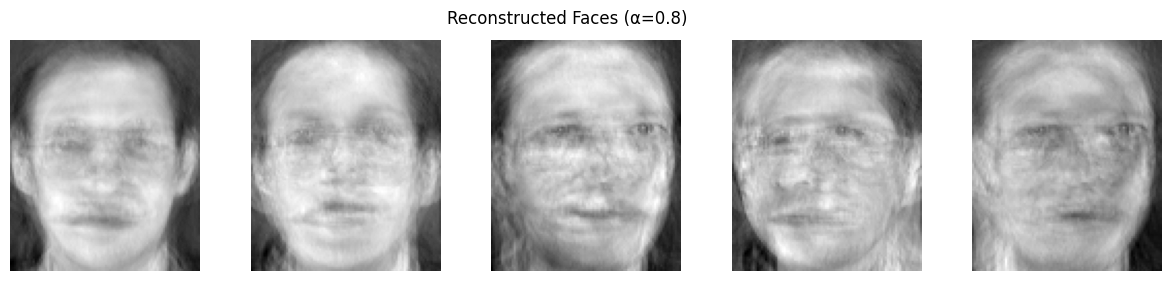

Alpha: 0.85, Components retained: 51
Reconstructed shape: (5, 10304)


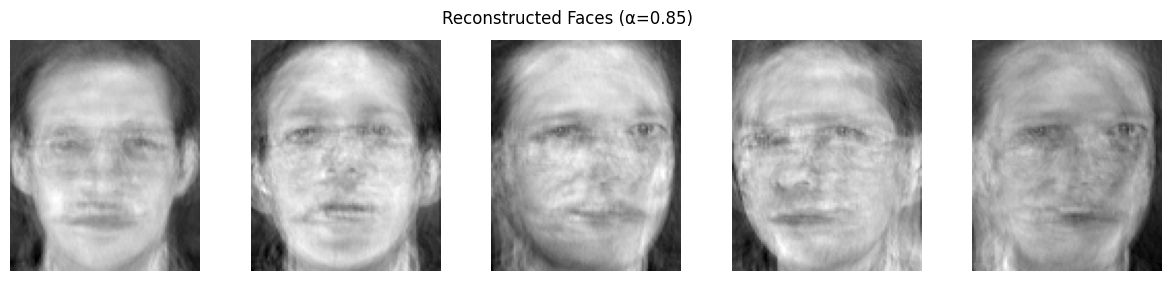

Alpha: 0.9, Components retained: 76
Reconstructed shape: (5, 10304)


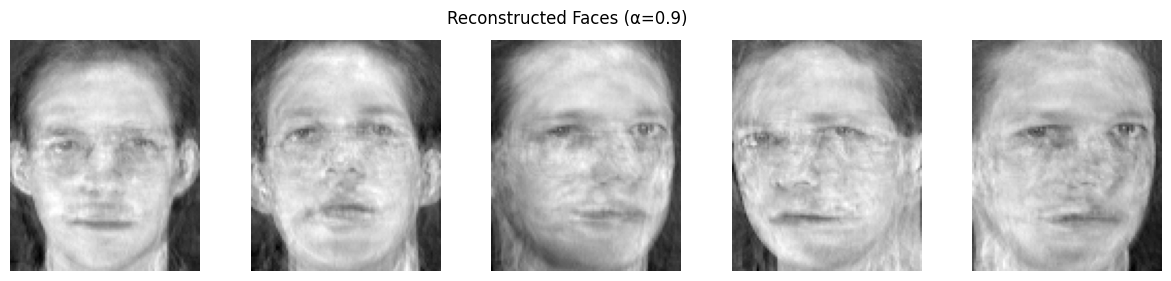

Alpha: 0.95, Components retained: 115
Reconstructed shape: (5, 10304)


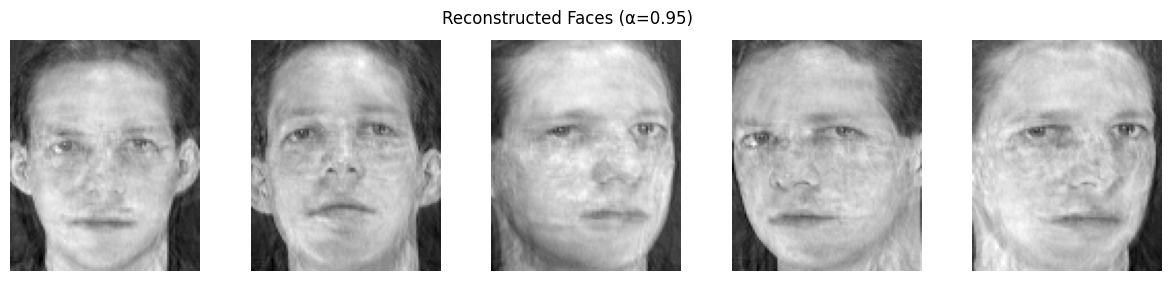

In [4]:
# PCA with variance retention
alphas = [0.8, 0.85, 0.9, 0.95]
pca_results = {}

for alpha in alphas:
    pca = PCA(n_components=alpha, svd_solver='full')
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    print(f'Alpha: {alpha}, Components retained: {pca.n_components_}')
    pca_results[alpha] = {
        'pca': pca,
        'X_train_pca': X_train_pca,
        'X_test_pca': X_test_pca,
    }

    # Visualize a few reconstructed faces
    reconstructed = pca.inverse_transform(X_train_pca[:5])
    print(f'Reconstructed shape: {reconstructed.shape}')
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axs[i].imshow(reconstructed[i].reshape((112, 92)), cmap='gray')
        axs[i].axis('off')
    plt.suptitle(f'Reconstructed Faces (α={alpha})')
    plt.show()

In [5]:
# Save arrays for reuse in clustering step
np.save('./npy/X_train.npy', X_train)
np.save('./npy/X_test.npy', X_test)
np.save('./npy/y_train.npy', y_train)
np.save('./npy/y_test.npy', y_test)
for alpha in alphas:
    np.save(f'./npy/pca_alpha_{alpha}_train.npy', pca_results[alpha]['X_train_pca'])
    np.save(f'./npy/pca_alpha_{alpha}_test.npy', pca_results[alpha]['X_test_pca'])

## PCA

Steps in PCA 
- Center the data: X = X - μ 
- Compute covariance matrix 
- Extract eigenvectors and eigenvalues 
- Project to new basis: Z = XW
- Reconstruct data: X = ZW^T + μ

In [13]:
from pca import PCA_GHALBAN
# from sklearn.metrics import pairwise_distances

pca = PCA_GHALBAN(alpha=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train) 

print(f'PCA with GHALBAN, Components retained: {pca.components}')

PCA with GHALBAN, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ...  0.00448495  0.0003145
   0.00661334]
 [ 0.00394554 -0.01424565 -0.01981946 ...  0.00516856  0.00077837
   0.00594902]
 [ 0.00384451 -0.01449853 -0.01962105 ...  0.00130254 -0.00042048
   0.00427985]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.02063381  0.00199236
  -0.00838872]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00124745 -0.00175064
  -0.01063136]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.01181052  0.00180847
  -0.00782502]]


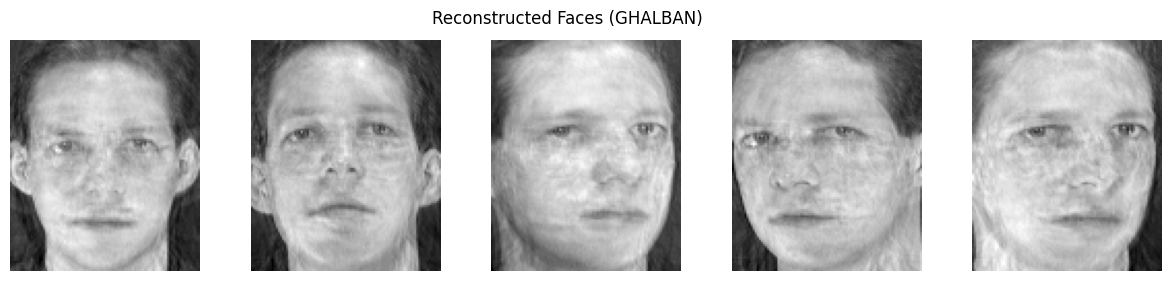

In [14]:
# Visualize a few reconstructed faces
reconstructed = pca.inverse_transform(X_train_pca[:5])

# Visualize a few reconstructed faces
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(reconstructed[i].reshape((112, 92)), cmap='gray')
    axs[i].axis('off')
plt.suptitle('Reconstructed Faces (GHALBAN)')
plt.show()

Alpha: 0.8, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ... -0.00778101  0.00343862
  -0.00406728]
 [ 0.00394554 -0.01424565 -0.01981946 ... -0.00798029 -0.00069583
  -0.00425275]
 [ 0.00384451 -0.01449853 -0.01962105 ... -0.00854379  0.00081495
  -0.00546642]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.01112122 -0.01993913
   0.0004344 ]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00371662 -0.0177102
   0.00066408]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.00546495 -0.01006843
   0.00301118]]
(200, 36)
Reconstructed shape: (5, 10304)


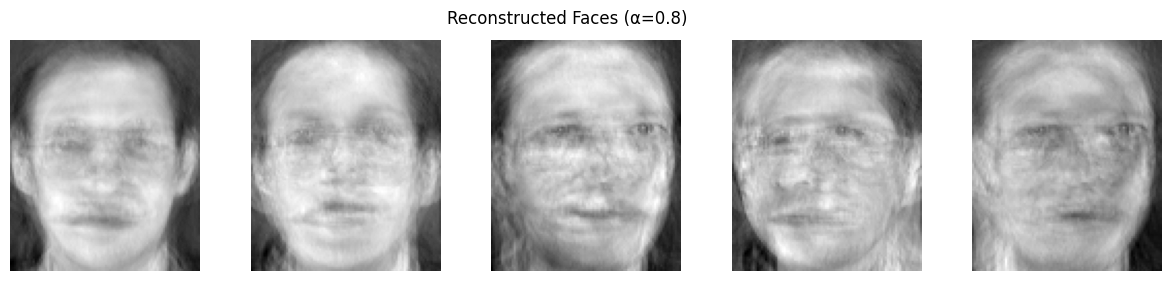

Alpha: 0.85, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ... -0.0054864   0.00135869
  -0.00270256]
 [ 0.00394554 -0.01424565 -0.01981946 ... -0.00652762  0.00043369
  -0.00484479]
 [ 0.00384451 -0.01449853 -0.01962105 ... -0.00497704 -0.00027871
  -0.00476218]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.00444086 -0.02075634
  -0.0094093 ]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00236007 -0.02135241
  -0.00487805]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.00406895 -0.0217231
   0.00136198]]
(200, 51)
Reconstructed shape: (5, 10304)


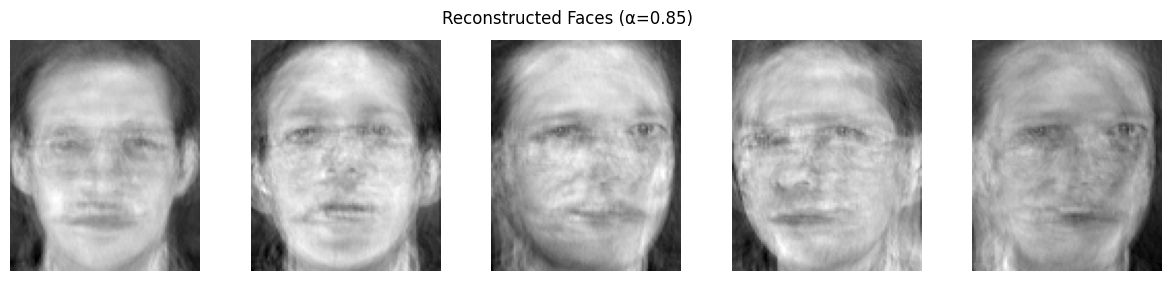

Alpha: 0.9, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ...  0.00386064  0.007156
   0.00361649]
 [ 0.00394554 -0.01424565 -0.01981946 ...  0.002691    0.00827635
   0.00315171]
 [ 0.00384451 -0.01449853 -0.01962105 ...  0.00046914  0.00767868
   0.00258637]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.01555597 -0.00363809
  -0.01597427]
 [ 0.00501108  0.01055497 -0.01355881 ... -0.00282898 -0.00809339
  -0.0226711 ]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.00231385 -0.0121849
  -0.03189291]]
(200, 76)
Reconstructed shape: (5, 10304)


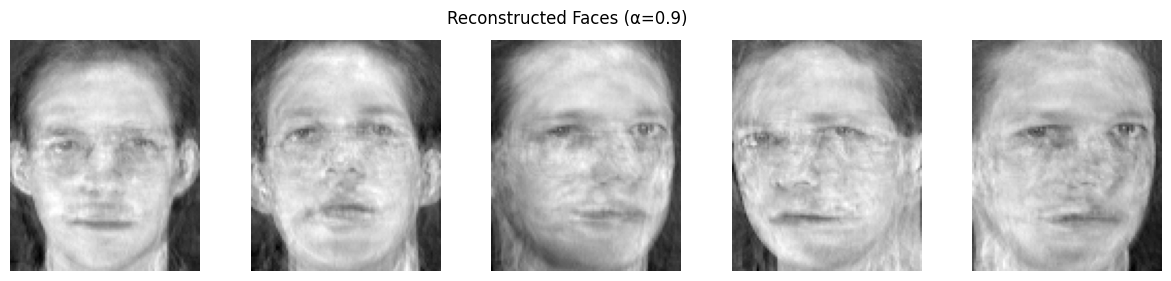

Alpha: 0.95, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ...  0.00448495  0.0003145
   0.00661334]
 [ 0.00394554 -0.01424565 -0.01981946 ...  0.00516856  0.00077837
   0.00594902]
 [ 0.00384451 -0.01449853 -0.01962105 ...  0.00130254 -0.00042048
   0.00427985]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.02063381  0.00199236
  -0.00838872]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00124745 -0.00175064
  -0.01063136]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.01181052  0.00180847
  -0.00782502]]
(200, 115)
Reconstructed shape: (5, 10304)


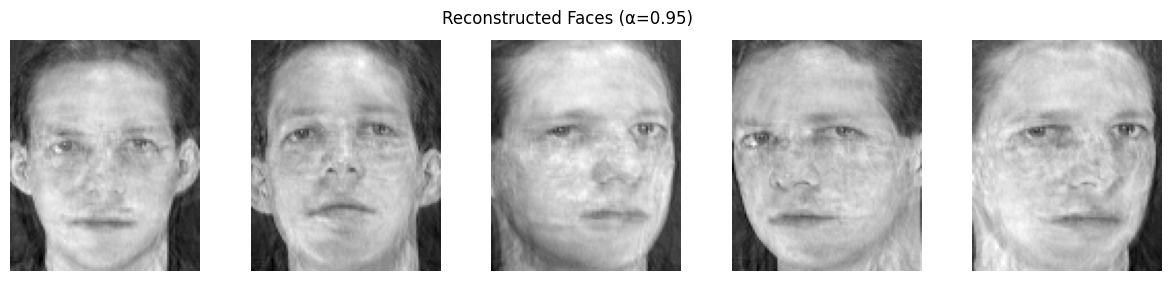

In [ ]:
# PCA with variance retention
alphas = [0.8, 0.85, 0.9, 0.95]
pca_results = {}
X_train_pca = {}
X_test_pca = {}

for alpha in alphas:
    pca = PCA_GHALBAN(alpha=alpha)
    # we fit first using the training set
    pca.fit(X_train)

    # then we transform the training and test sets
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f'Alpha: {alpha}, Components retained: {pca.components}')
    pca_results[alpha] = {
        'pca': pca,
        'X_train_pca': X_train_pca,
        'X_test_pca': X_test_pca,
    }

    # Visualize a few reconstructed faces
    reconstructed = pca.inverse_transform(X_train_pca[:5])
    print(f'Reconstructed shape: {reconstructed.shape}')
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axs[i].imshow(reconstructed[i].reshape((112, 92)), cmap='gray')
        axs[i].axis('off')
    plt.suptitle(f'Reconstructed Faces (α={alpha})')
    plt.show()
# Save arrays for reuse in clustering step
np.save('./npy/X_train.npy', X_train)
np.save('./npy/X_test.npy', X_test)
np.save('./npy/y_train.npy', y_train)
np.save('./npy/y_test.npy', y_test)
for alpha in alphas:
    np.save(f'./npy/pca_alpha_{alpha}_train.npy', pca_results[alpha]['X_train_pca'])
    np.save(f'./npy/pca_alpha_{alpha}_test.npy', pca_results[alpha]['X_test_pca'])  

## BONUS: Autoencoder
### Training

In [11]:
from autoencoder import AutoEncoder
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameters
# Parameters
input_dim = X_train.shape[1]  # 10304
hidden_dim = 64
bottleneck_dim = 32              
batch_size = 16
learning_rate = 1e-4
num_epochs = 30

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # ensure float32
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, shuffle=True)
# test_loader = torch.utils.data.DataLoader(X_test, batch_size=batch_size, shuffle=False)

model = AutoEncoder(input_dim, hidden_dim, bottleneck_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training 
for epoch in range(num_epochs):
    model.train() # setting the model to training mode
    run_loss = 0.0
    for batch in train_loader:
        # Zero the gradients
        data = batch[0] # Ensure data is float
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        
        # Compute loss
        loss = criterion(outputs, data)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        run_loss += loss.item()
    
    epoch_loss = run_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
# Save the model
torch.save(model.state_dict(), 'autoencoder.pth')
# Load the model
model.load_state_dict(torch.load('autoencoder.pth'))
model.eval()
# Test the model    


Epoch [1/30], Loss: 15058.8214
Epoch [2/30], Loss: 15067.5102
Epoch [3/30], Loss: 14999.3277
Epoch [4/30], Loss: 15084.4521
Epoch [5/30], Loss: 15044.0793
Epoch [6/30], Loss: 15113.2934
Epoch [7/30], Loss: 15010.7272
Epoch [8/30], Loss: 15117.2803
Epoch [9/30], Loss: 15122.3984
Epoch [10/30], Loss: 15124.6392
Epoch [11/30], Loss: 15013.3490
Epoch [12/30], Loss: 15024.5220
Epoch [13/30], Loss: 15111.8573
Epoch [14/30], Loss: 15021.1372
Epoch [15/30], Loss: 15035.2975
Epoch [16/30], Loss: 15115.2308
Epoch [17/30], Loss: 15117.4970
Epoch [18/30], Loss: 15088.8087
Epoch [19/30], Loss: 15050.3550
Epoch [20/30], Loss: 15095.0530
Epoch [21/30], Loss: 15096.5992
Epoch [22/30], Loss: 15127.2222
Epoch [23/30], Loss: 15017.6236
Epoch [24/30], Loss: 15030.9014
Epoch [25/30], Loss: 15047.1884
Epoch [26/30], Loss: 15066.3029
Epoch [27/30], Loss: 15031.5672
Epoch [28/30], Loss: 15089.2678
Epoch [29/30], Loss: 15014.8283
Epoch [30/30], Loss: 15079.5538


/tmp/ipykernel_8363/277358877.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('autoencoder.pth'))


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=10304, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10304, bias=True)
    (3): Sigmoid()
  )
)

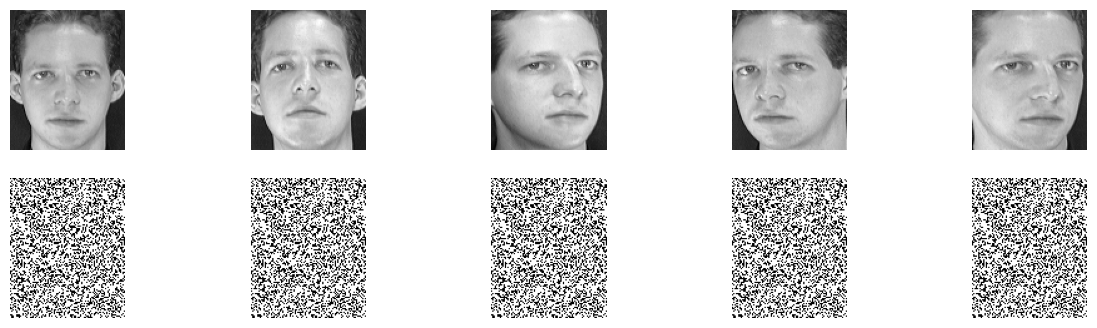

In [17]:
import matplotlib.pyplot as plt

model.eval()  # Set model to evaluation mode
sample = torch.tensor(X_train[:5], dtype=torch.float32)  # Take 5 examples
reconstructed = model(sample).detach().numpy()

fig, axs = plt.subplots(2, 5, figsize=(15, 4))
for i in range(5):
    axs[0, i].imshow(sample[i].reshape(112, 92), cmap='gray')        # original
    axs[0, i].axis('off')
    axs[1, i].imshow(reconstructed[i].reshape(112, 92), cmap='gray') # reconstructed
    axs[1, i].axis('off')
plt.show()


In [18]:
from autoencoder import AutoEncoder


def train_autoencoder(X_train, X_validate, input_dim, hidden_dim, bottleneck_dim, batch_size, lr, num_epochs):
    model = AutoEncoder(input_dim, hidden_dim, bottleneck_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
    
    for epoch in range(num_epochs):
        perm = torch.randperm(X_train.size(0))
        model.train()  # Set model to training mode
        run_loss = 0.0
        for i in range(0, X_train.size(0), batch_size):
            indices = perm[i:i + batch_size]
            batch = X_train[indices]
            data = batch[0]
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            run_loss += loss.item()
        epoch_loss = run_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    #     for data in train_loader:
    #         optimizer.zero_grad()
    #         outputs = model(data)
    #         loss = criterion(outputs, data)
    #         loss.backward()
    #         optimizer.step()
    #         run_loss += loss.item()
    # avg_loss = run_loss / len(train_loader)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        reconstructed = model(X_validate)
        loss = criterion(reconstructed, X_validate)
        avg_loss = loss.item()
    print(f'Validation Loss: {avg_loss:.4f}')
    return avg_loss
    

In [19]:
import itertools
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

validation_size = 0.2*len(X_train_tensor)
X_validate_tensor = X_train_tensor[len(X_train_tensor)-int(validation_size):]
X_train_tensor = X_train_tensor[:int(validation_size)]

best_model = None  
best_loss = float('inf')
best_config = None


# Grid search
input_dim = X_train_tensor.shape[1]
hidden_dims = [256, 512, 1024]
bottleneck_dims = [64, 128]
learning_rates = [0.001]
batch_sizes = [32, 64]
epochs = 100

for hidden_dim, bottleneck_dim, lr, batch_size in itertools.product(hidden_dims, bottleneck_dims, learning_rates, batch_sizes):
    print(f"Training with hidden_dim={hidden_dim}, bottleneck_dim={bottleneck_dim}, lr={lr}, batch_size={batch_size}")
    avg_loss = train_autoencoder(
        X_train_tensor,
        X_validate_tensor,
        input_dim,
        hidden_dim,
        bottleneck_dim,
        batch_size,
        lr,
        epochs
    )
    print(f"Average loss: {avg_loss:.6f}")
    
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_config = {
            'hidden_dim': hidden_dim,
            'bottleneck_dim': bottleneck_dim,
            'learning_rate': lr,
            'batch_size': batch_size,
            'epochs': epochs
        }
        best_model = model
        # Save the best model
        torch.save(best_model.state_dict(), 'best_autoencoder.pth')
        print("Best model saved.")  
print("\nBest Configuration Found:")
print(best_config)
print(f"Best Loss: {best_loss:.6f}")
# Load the best model
best_model = AutoEncoder(input_dim, best_config['hidden_dim'], best_config['bottleneck_dim']) 




Training with hidden_dim=256, bottleneck_dim=64, lr=0.001, batch_size=32
Epoch [1/100], Loss: 2714.1924
Epoch [2/100], Loss: 2287.1243
Epoch [3/100], Loss: 2786.8349
Epoch [4/100], Loss: 2297.8168
Epoch [5/100], Loss: 2690.7595
Epoch [6/100], Loss: 3277.9755
Epoch [7/100], Loss: 2622.0974
Epoch [8/100], Loss: 3195.6961
Epoch [9/100], Loss: 2252.9591
Epoch [10/100], Loss: 2988.8483
Epoch [11/100], Loss: 3013.8206
Epoch [12/100], Loss: 2597.4497
Epoch [13/100], Loss: 2793.0757
Epoch [14/100], Loss: 2858.5760
Epoch [15/100], Loss: 2714.8708
Epoch [16/100], Loss: 2545.2275
Epoch [17/100], Loss: 2285.2229
Epoch [18/100], Loss: 2804.2060
Epoch [19/100], Loss: 2689.2233
Epoch [20/100], Loss: 2403.1469
Epoch [21/100], Loss: 3068.4041
Epoch [22/100], Loss: 2429.5638
Epoch [23/100], Loss: 3301.4361
Epoch [24/100], Loss: 2790.7480
Epoch [25/100], Loss: 2822.6266
Epoch [26/100], Loss: 2403.0270
Epoch [27/100], Loss: 2790.0596
Epoch [28/100], Loss: 2625.2682
Epoch [29/100], Loss: 2805.7385
Epoch [3

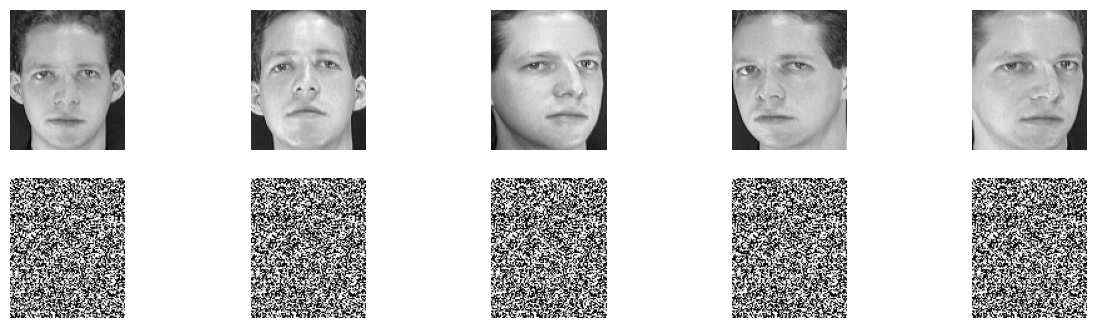

In [20]:
with torch.no_grad():
    sample = X_train_tensor[:5]
    reconstructed = best_model(sample).detach().numpy()
    fig, axs = plt.subplots(2, 5, figsize=(15, 4))
    for i in range(5):
        axs[0, i].imshow(sample[i].reshape(112, 92), cmap='gray')        # original
        axs[0, i].axis('off')
        axs[1, i].imshow(reconstructed[i].reshape(112, 92), cmap='gray') # reconstructed
        axs[1, i].axis('off')

    plt.show()
